# Deep Learning for Computer Vision

## 5.1 Introduction to convnets

In [5]:
from keras import layers
from keras import models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

### (image_height , image_width, image_channels)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 

The width and height dimensions tend to shrink as you go deeper in the network. 

The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

##### (3, 3, 64) outputs are flattened into vectors of shape (576, )

In [13]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

11493376/11490434 [==============================] - 69s 6us/step
Epoch 1/5
938/938 [==============================] - 22s 23ms/step - loss: 0.4004 - accuracy: 0.8701
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0484 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0305 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0198 - accuracy: 0.9938


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0275 - accuracy: 0.9920


0.9919999837875366

The accuracy increased from 97.8% (in chapter 2) to 99.2%

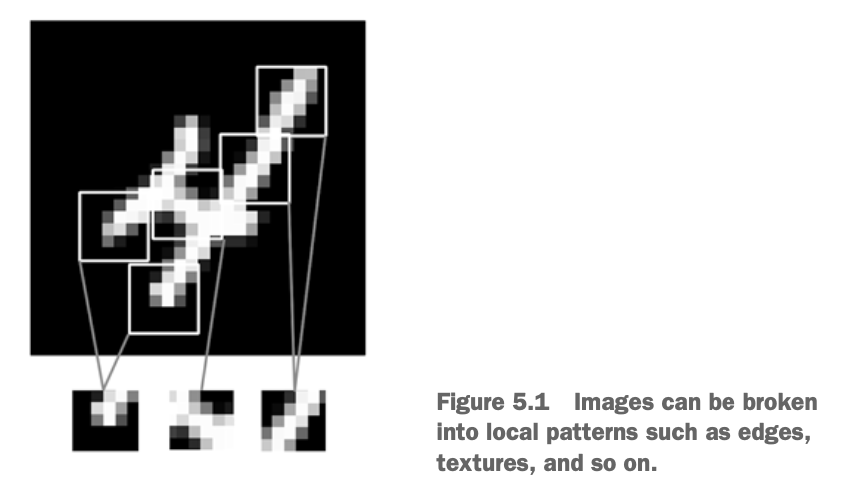

In [23]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_1.png")

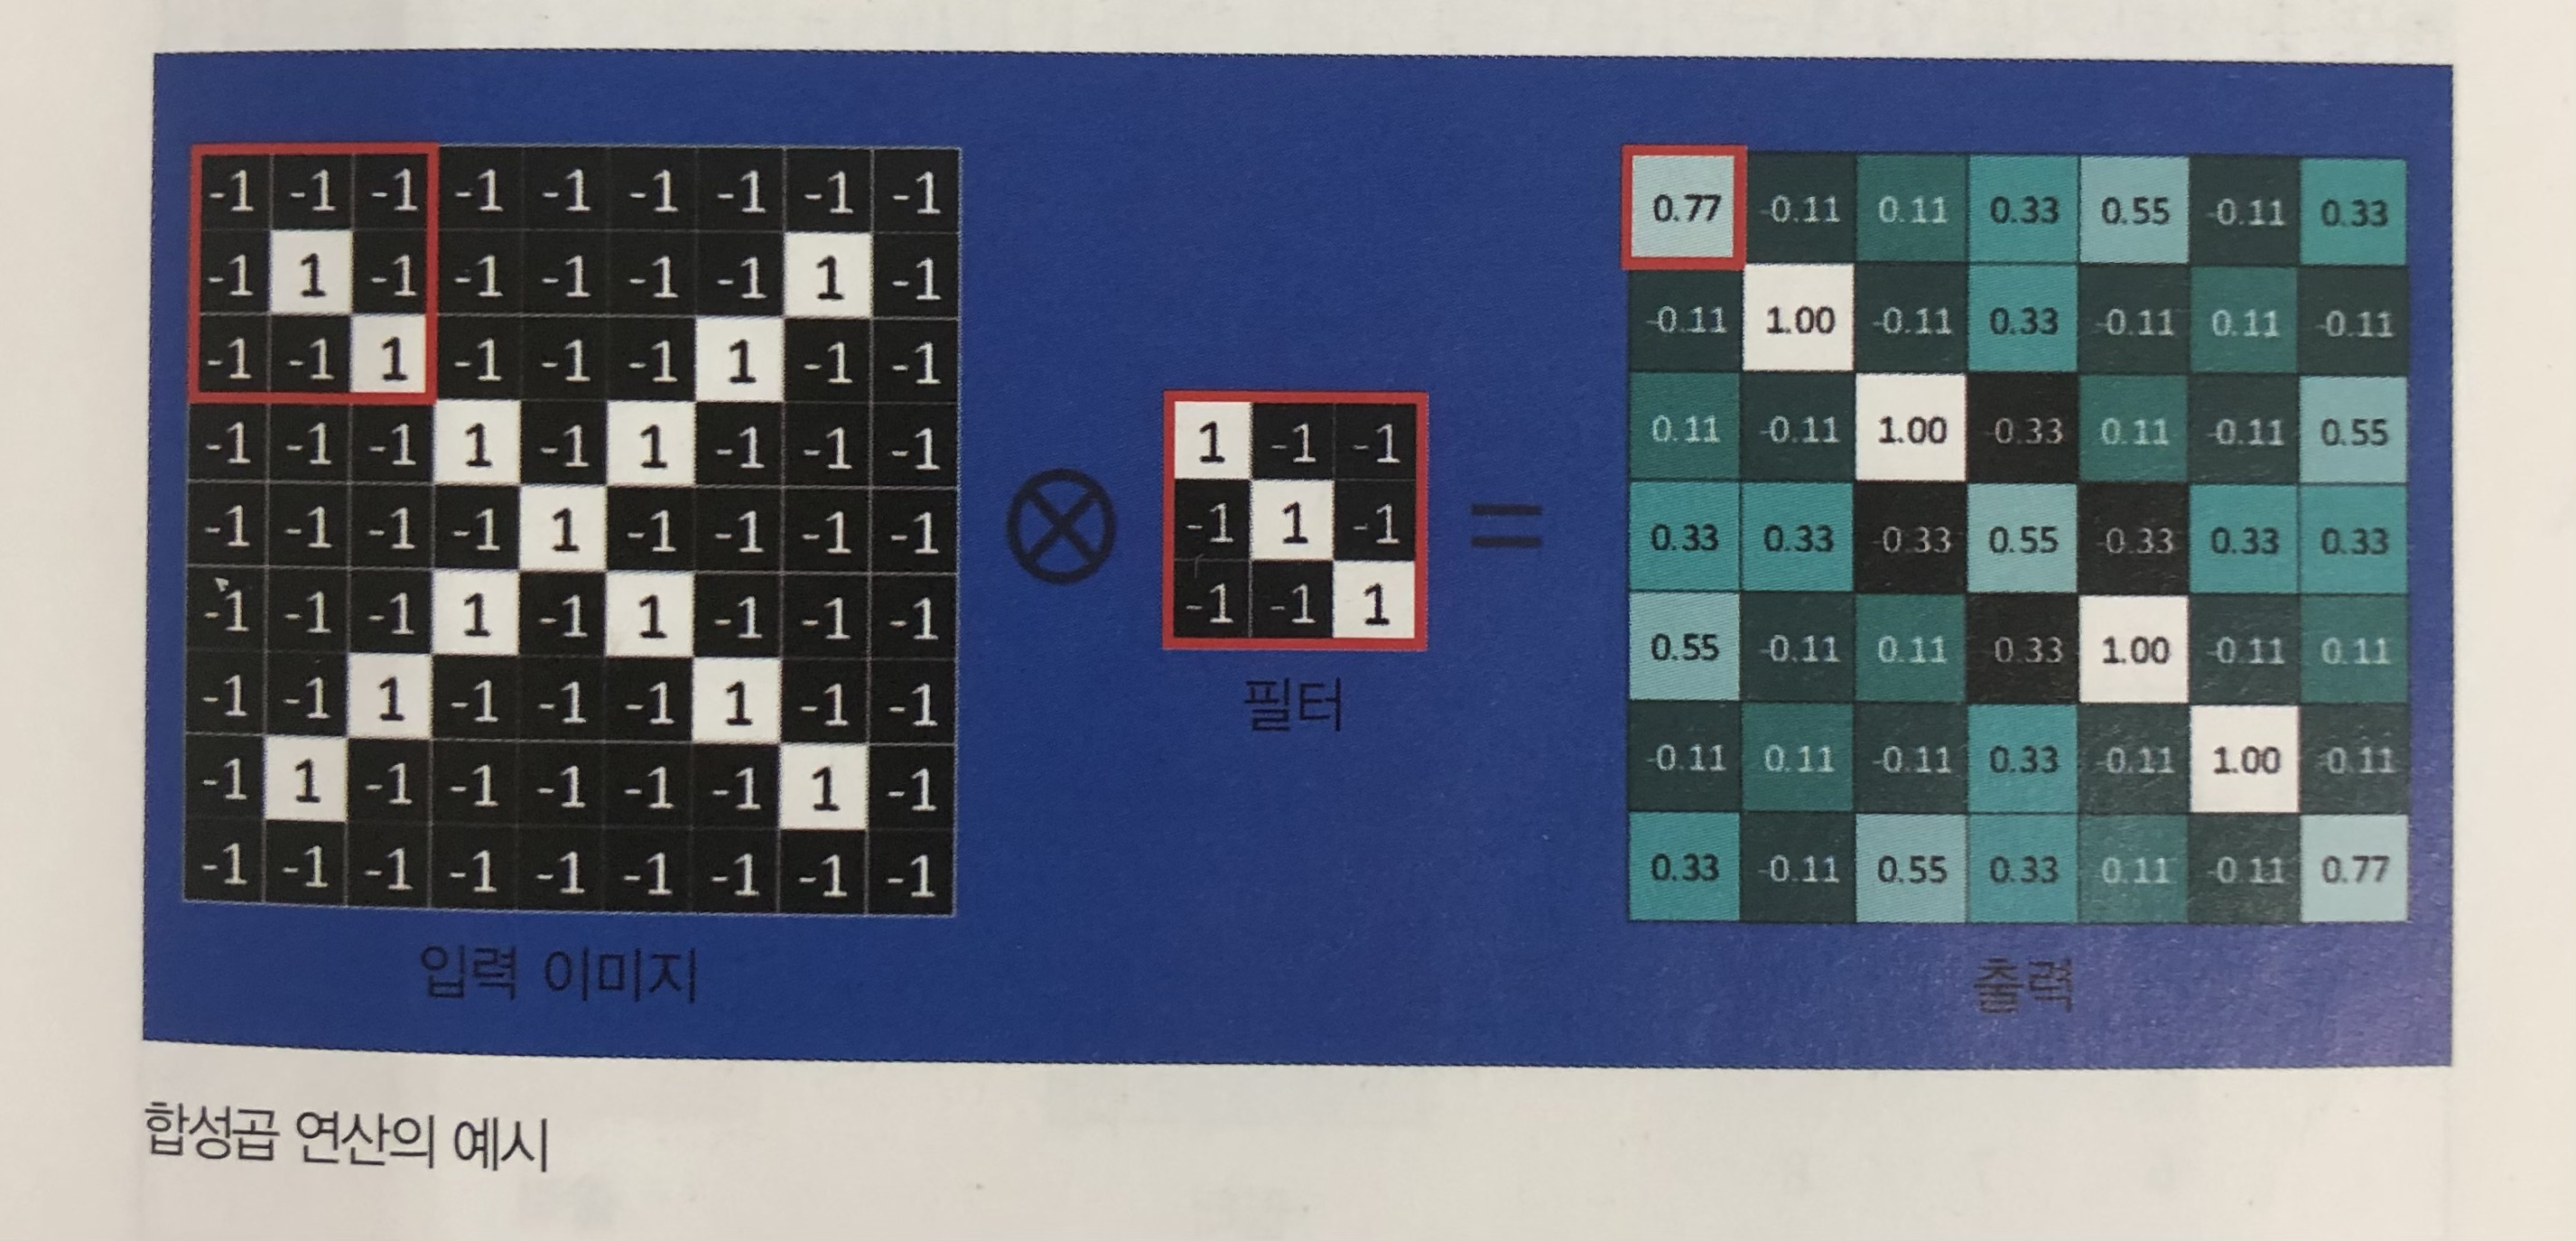

In [33]:
Image("/Users/mac/Dropbox/Y_AI_LAB/IMG_5340.jpeg")

##### * The patterns they laern are translation invariant
- This makes convnets data efficient when processing images

##### * They can learn spatial hierarchies of patters
- This allows convnets to efficiently learn increasingly complex and abstract visual concepts 

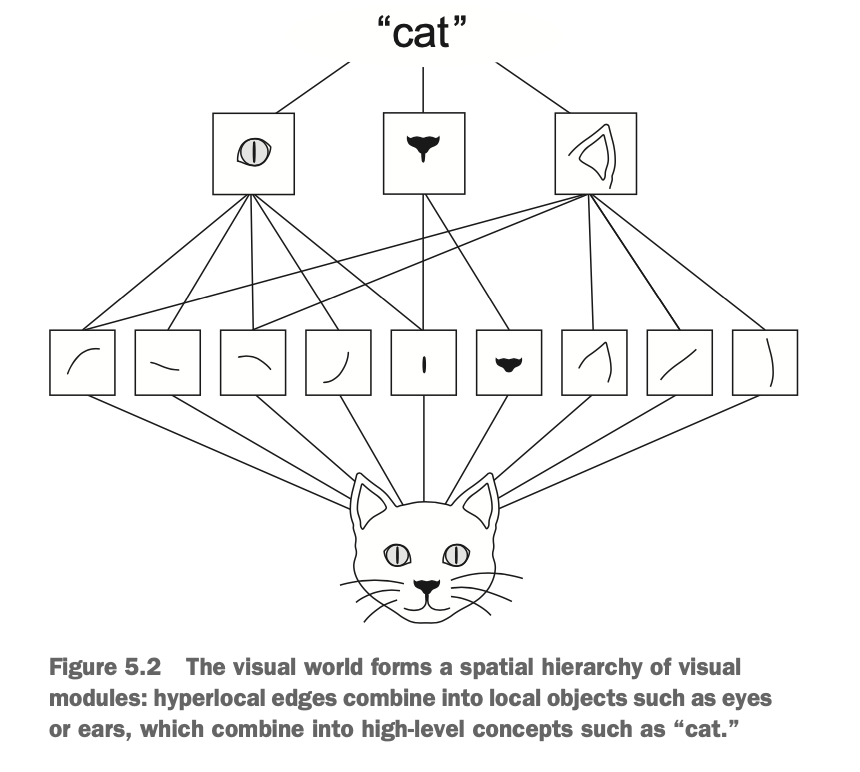

In [24]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_2.png")

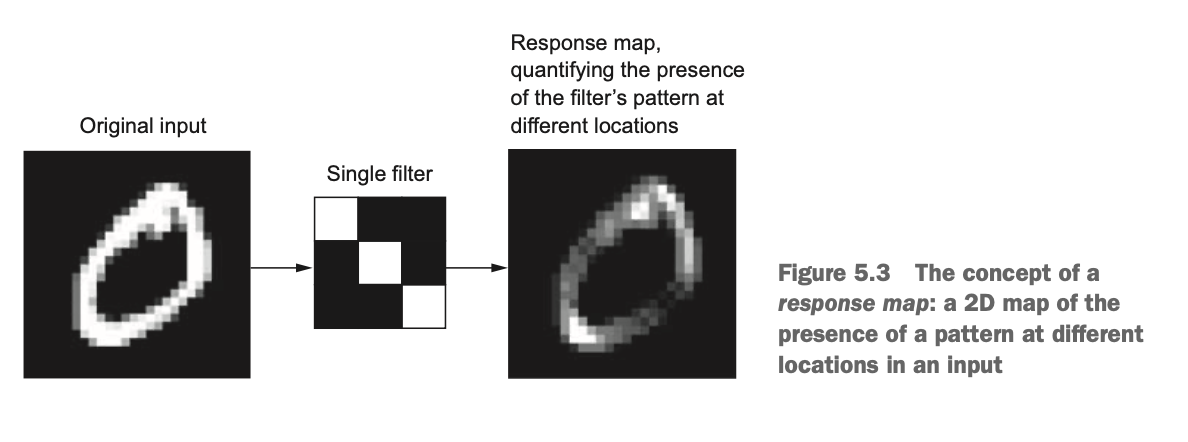

In [25]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_3.png")

#### FILTER

- Filters encode specific aspects of the input data: at a high level, a single filter could encode the concept “presence of a face in the input,” for instance.

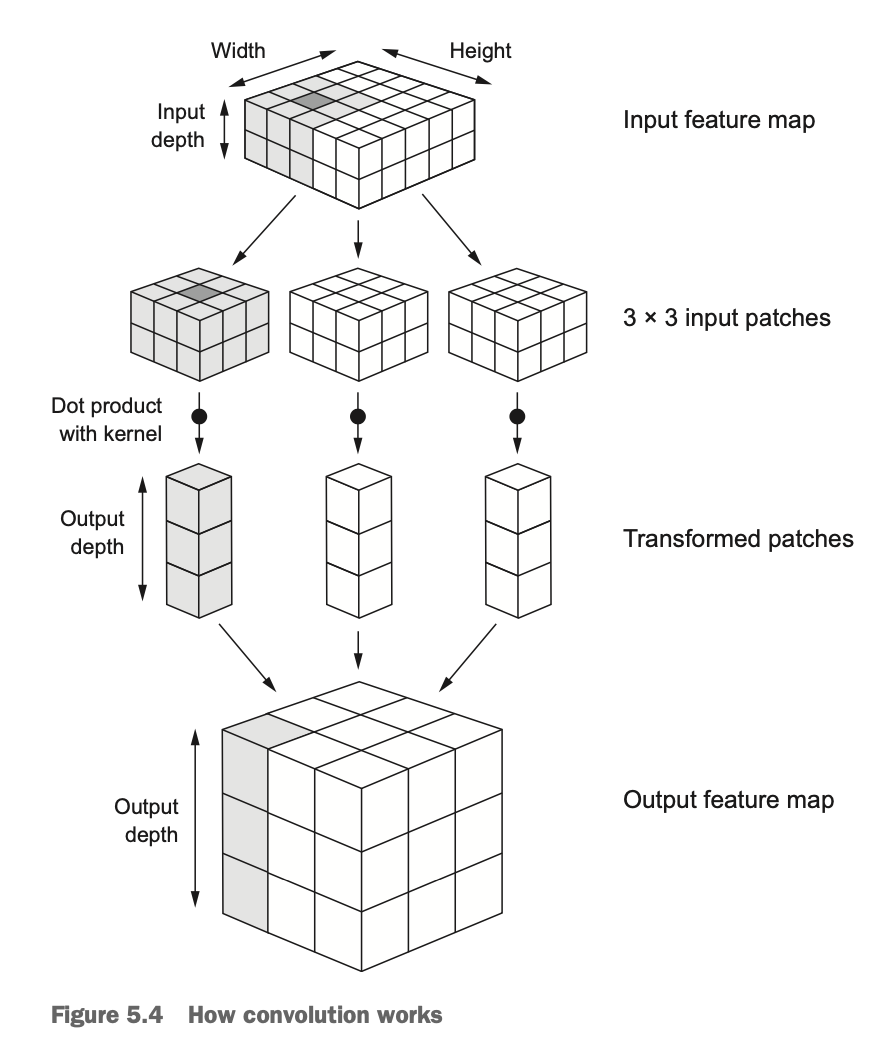

In [26]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_4.png")

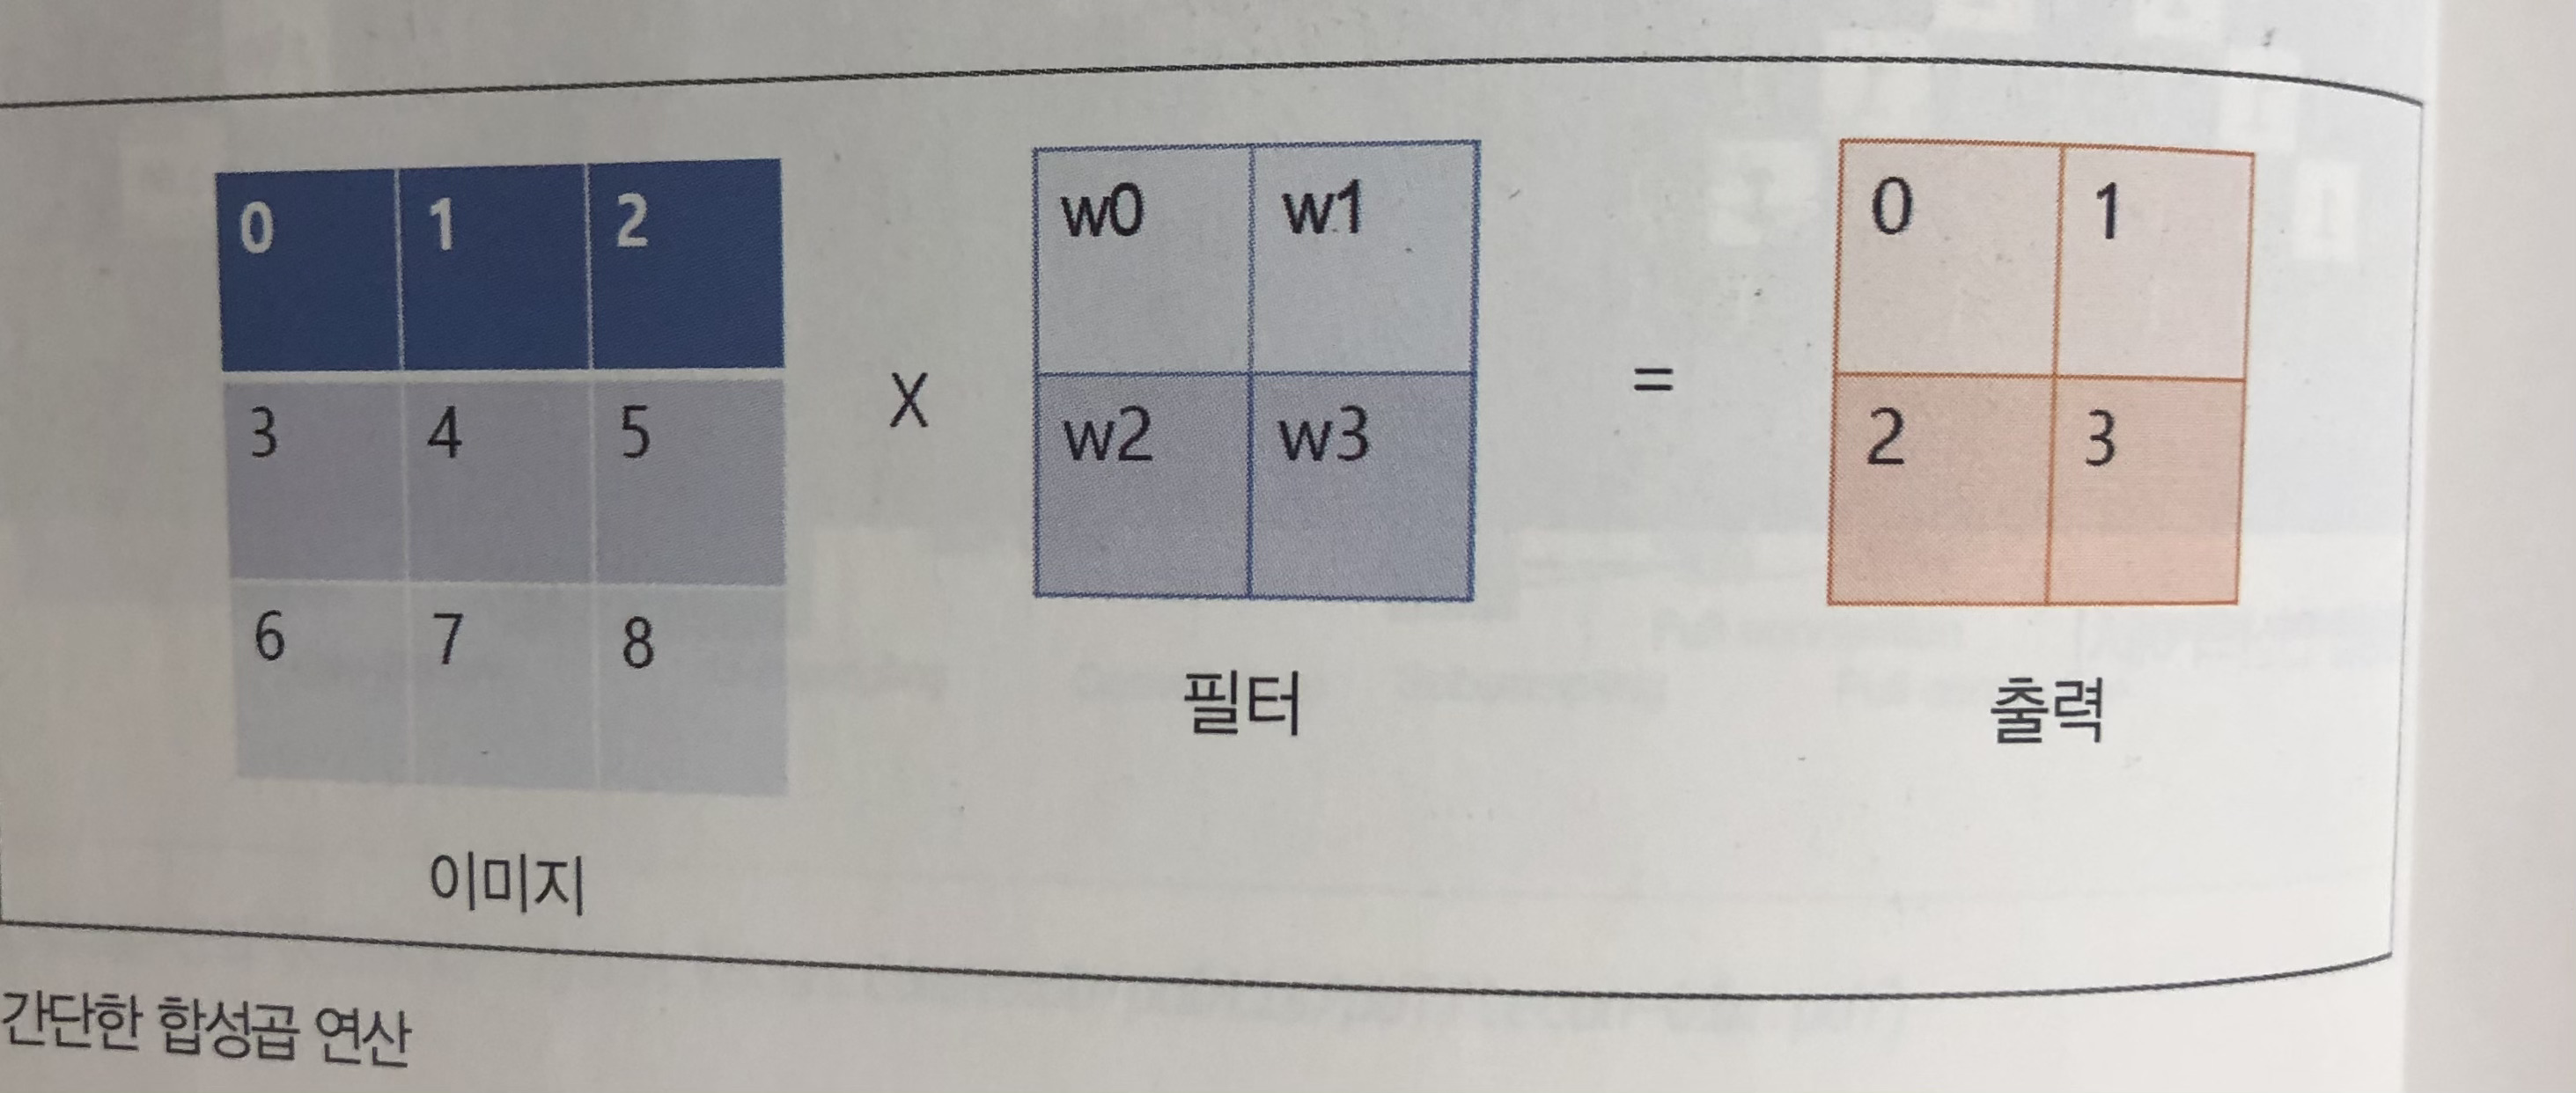

In [34]:
Image("/Users/mac/Dropbox/Y_AI_LAB/IMG_5341.jpeg")

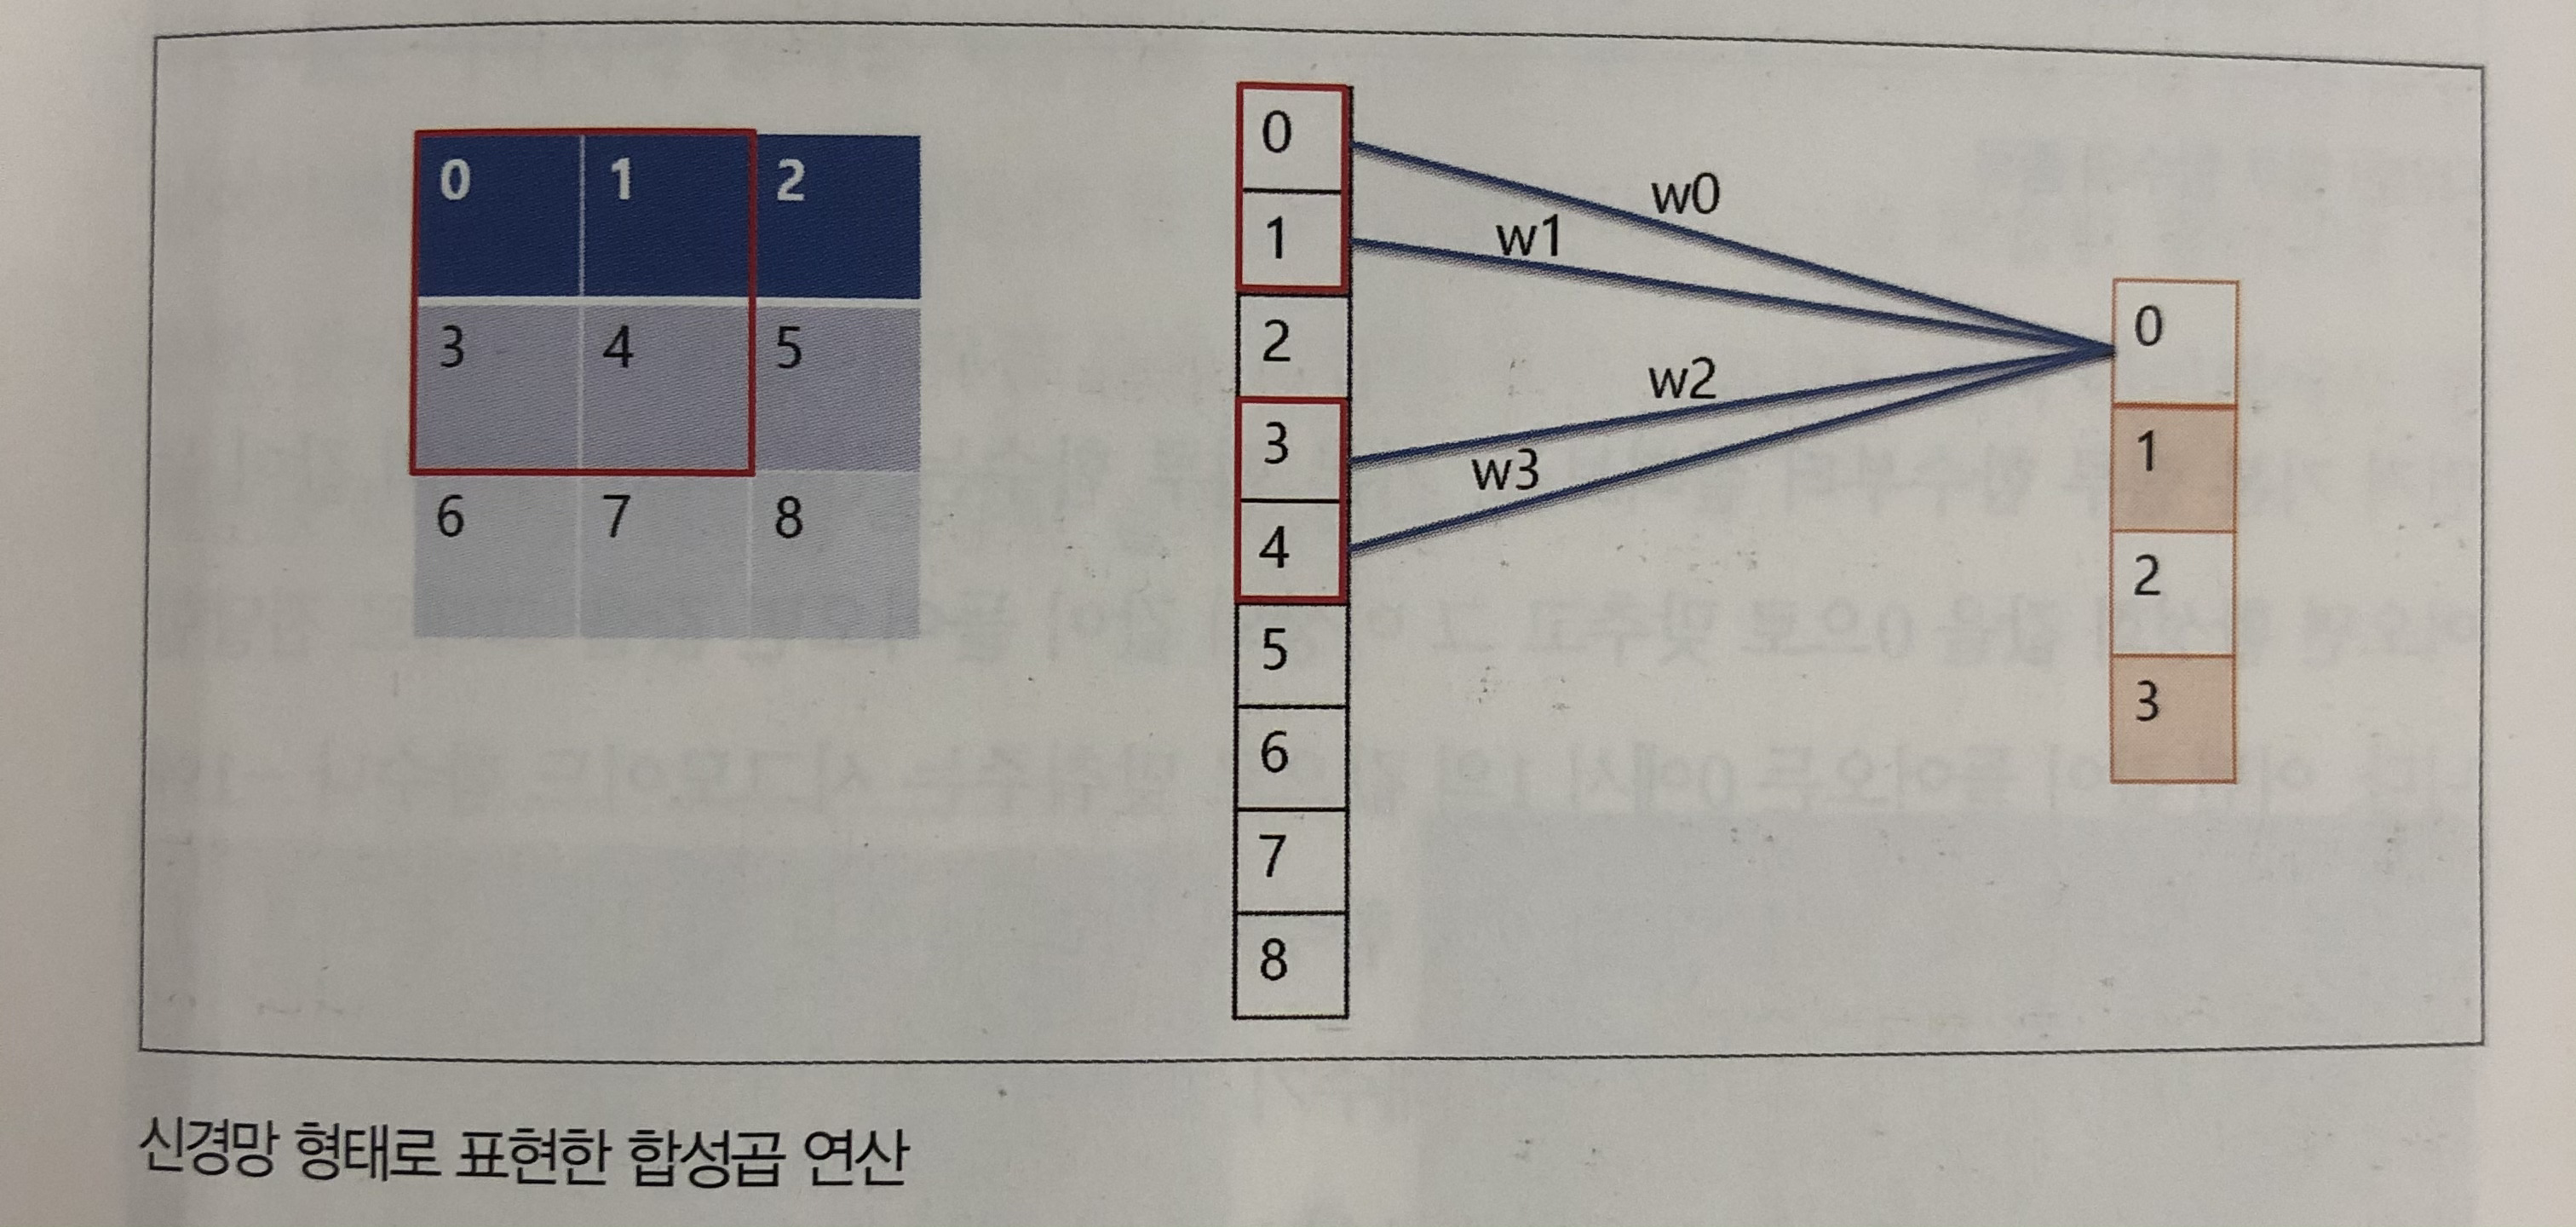

In [35]:
Image("/Users/mac/Dropbox/Y_AI_LAB/IMG_5342.jpeg")

### Understading border effects and padding

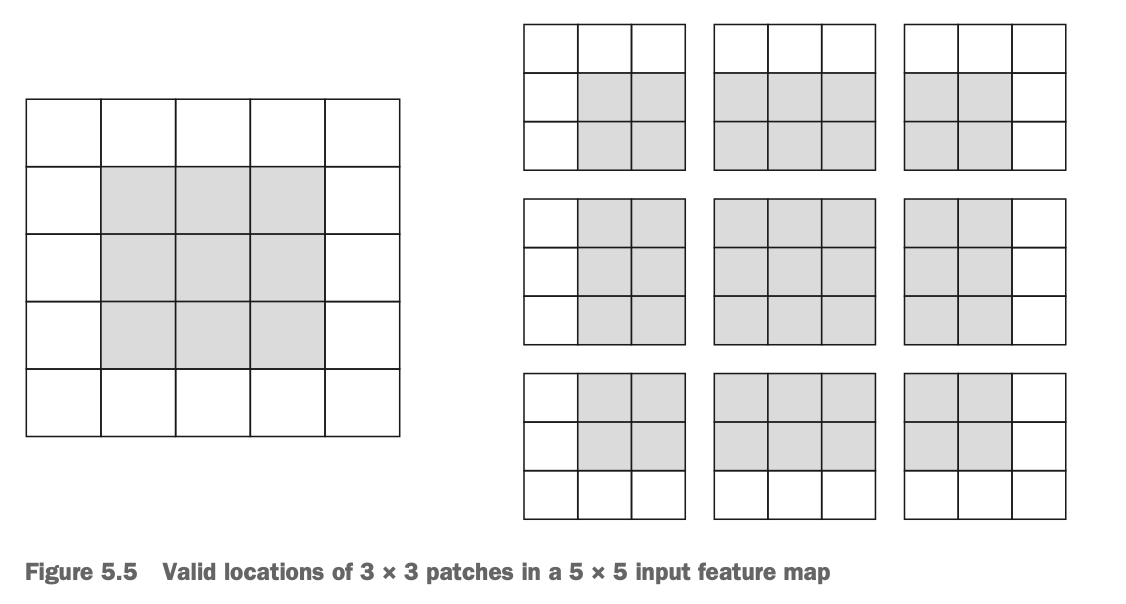

In [38]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_5.png")

- Consider a 5 × 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 × 3 window, forming a 3 × 3 grid (see figure 5.5). Hence, the output feature map will be 3 × 3. It shrinks a little: by exactly two tiles alongside each dimension, in this case.

- To get the same spatial dimensions as the input, you can us PADDING

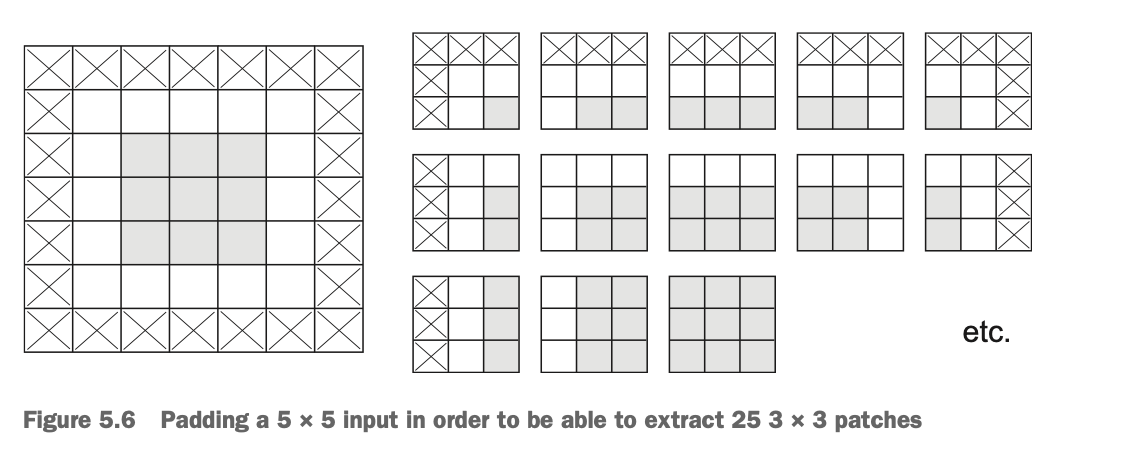

In [39]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_6.png")

### Understading convolution strides

#### the distance between two successive windows = parameter of the convolution (called its stride which defaults to 1)

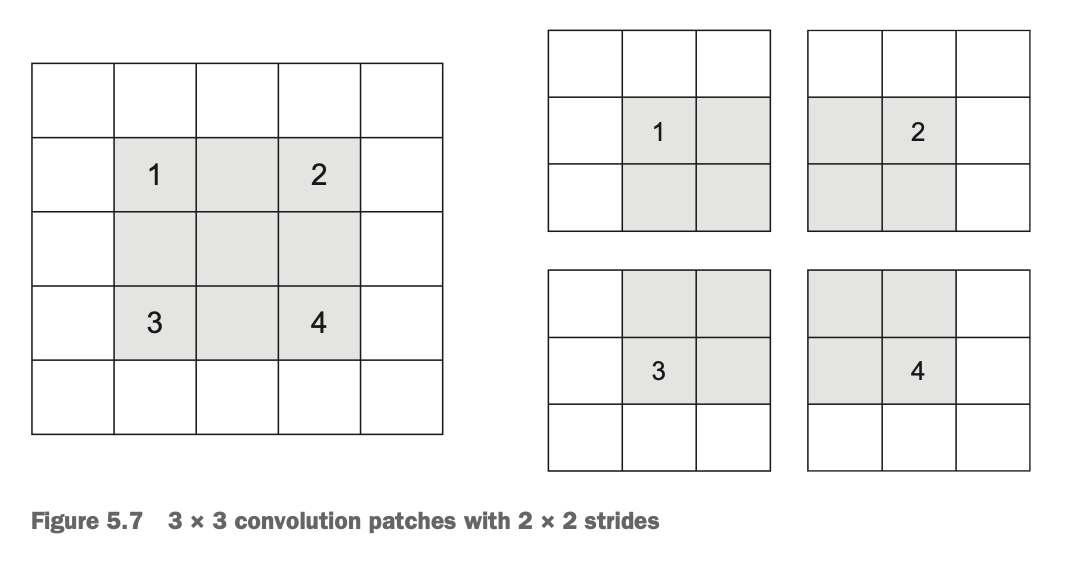

In [40]:
Image("/Users/mac/Dropbox/스크린샷/figure_5_7.png")

### Max-pooling operation

In [42]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model_no_max_pool.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model_no_max_pool.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [43]:
model_no_max_pool.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


- It isn’t conducive to learning a spatial hierarchy of features.
- This is far too large for such a small model and would result in intense overfitting.

#### * The role of max pooling : to aggressively downsample feature maps
- avoid overfitting

#### * Why Max-pooling instead of average pooling?
- more informativen(features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map)

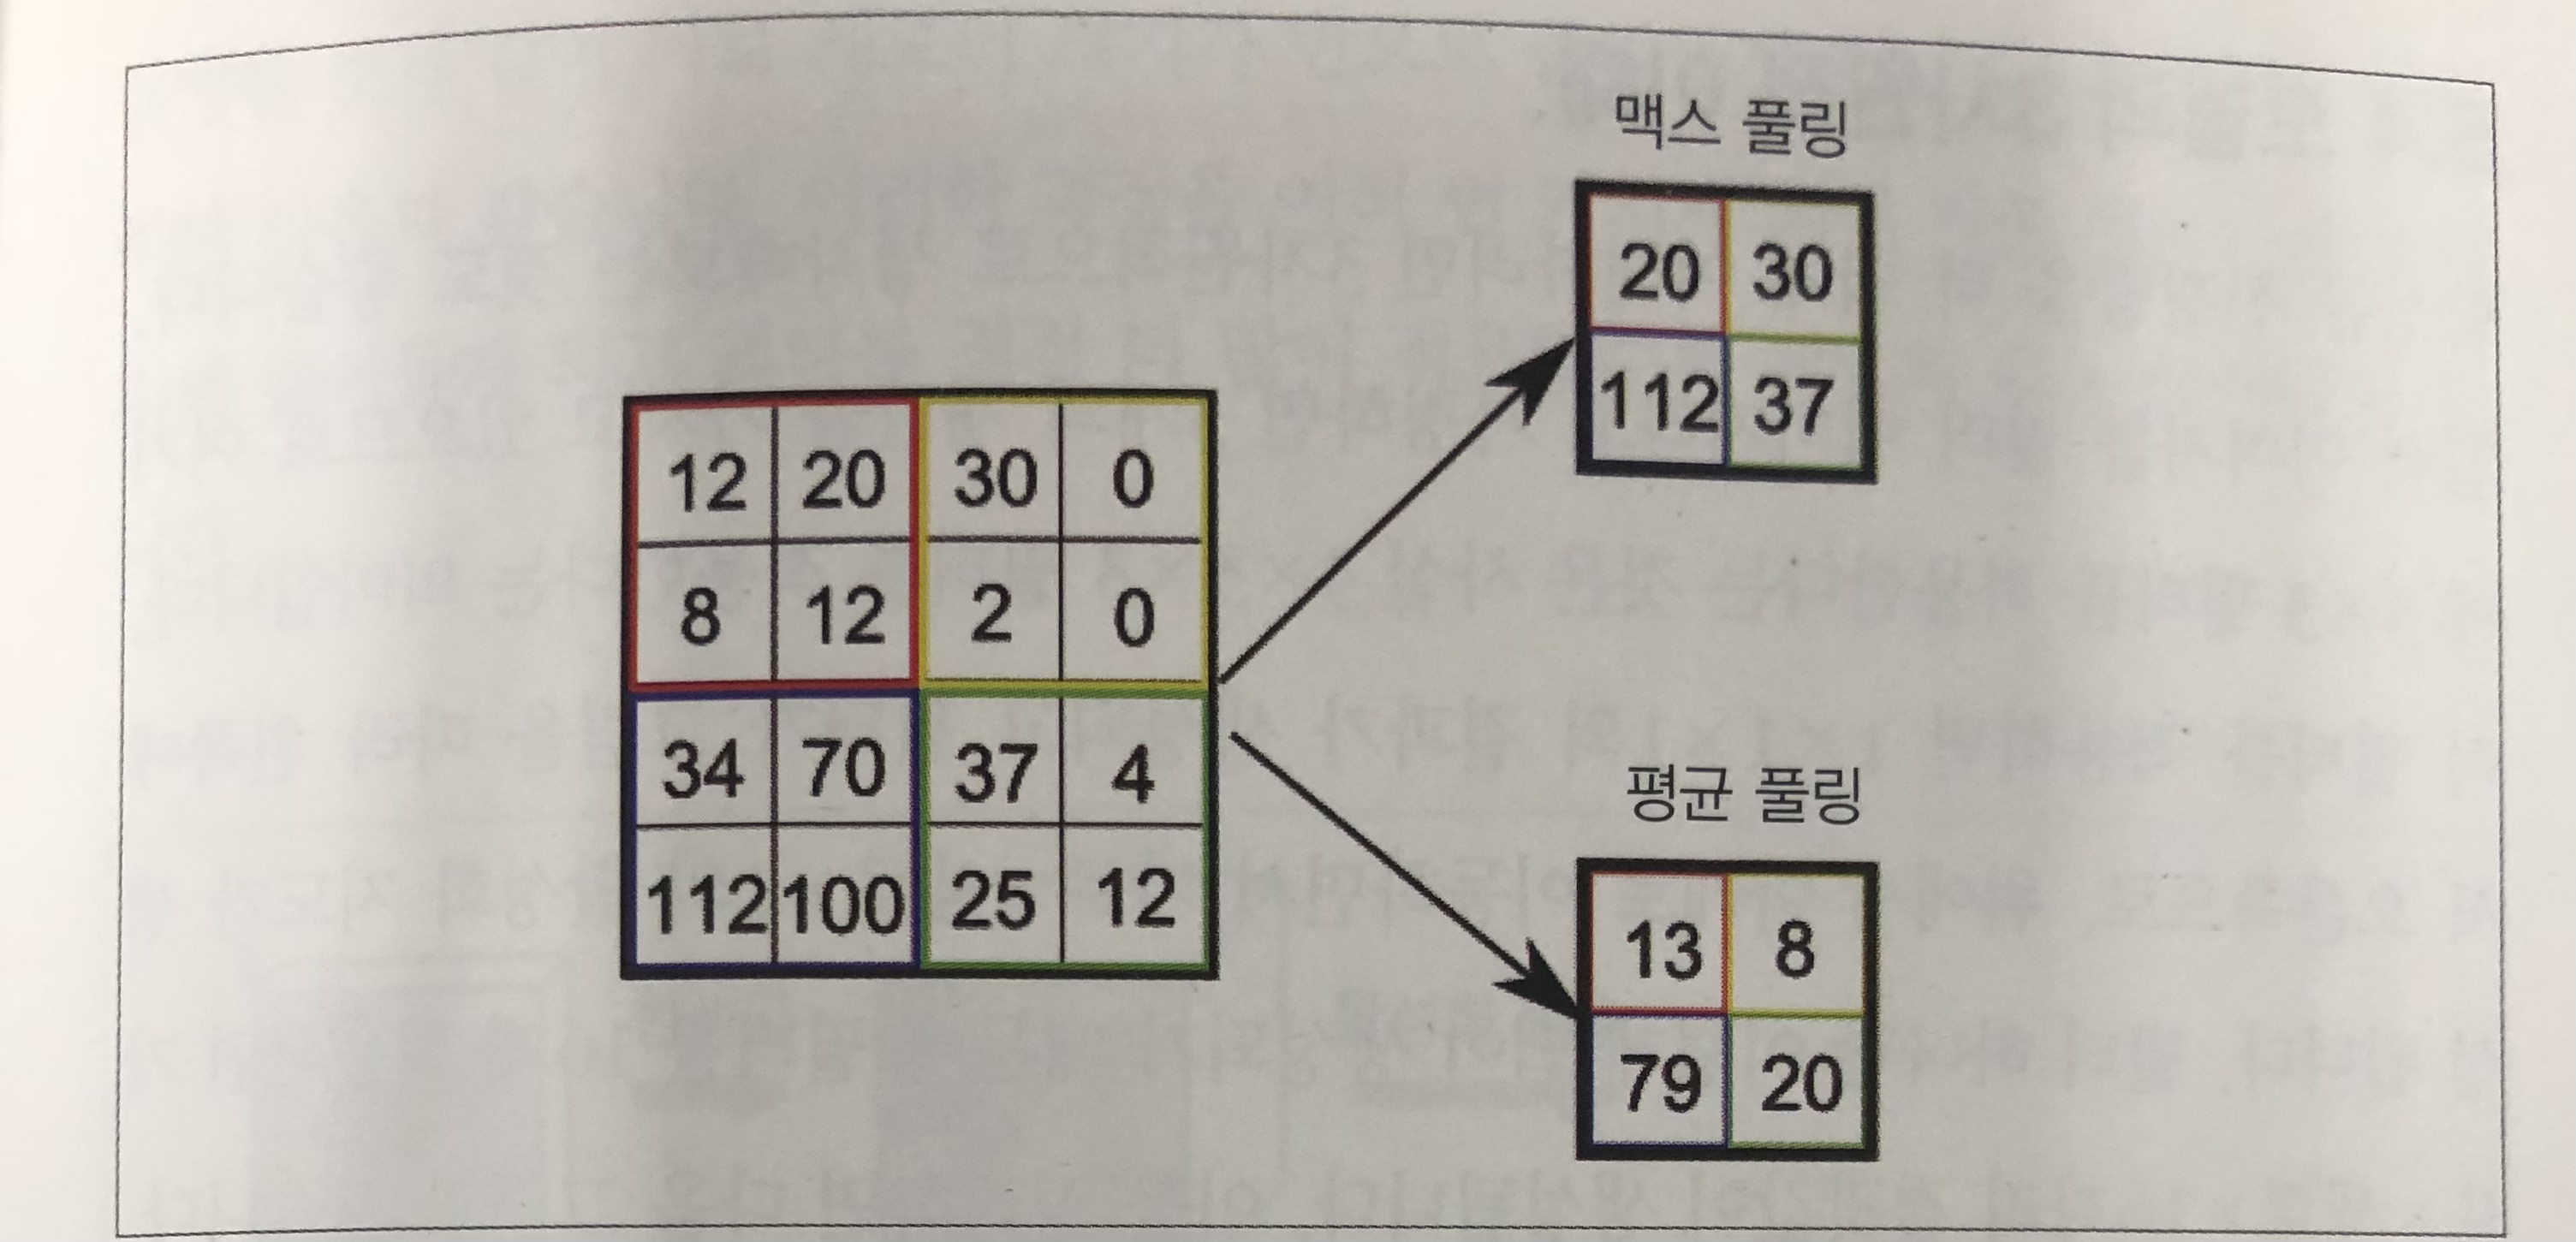

In [41]:
Image("/Users/mac/Dropbox/Y_AI_LAB/IMG_5343.jpeg")

## 5.2 Training a convnet from scratch on a small dataset

In [66]:
!pip install kaggle

You should consider upgrading via the '/Users/mac/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [83]:
!pip show kaggle

Name: kaggle
Version: 1.5.12
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /Users/mac/opt/anaconda3/lib/python3.8/site-packages
Requires: python-slugify, python-dateutil, six, certifi, requests, tqdm, urllib3
Required-by: 


In [84]:
!kaggle config path

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')


In [86]:
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 812M/812M [01:48<00:00, 8.36MB/s]
100%|████████████████████████████████████████| 812M/812M [01:48<00:00, 7.86MB/s]


In [94]:
import os, shutil

original_dataset_dir = '/Users/mac/Dropbox/Y_AI_LAB/kaggle_original_data'

base_dir = '/Users/mac/Dropbox/Y_AI_LAB/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [95]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [96]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [97]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [98]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [99]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [100]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [101]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [104]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

#### Data preprocessing

1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [135]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [136]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [137]:
history = model.fit_generator(
    train_generator, steps_per_epoch=100, epochs=30, validation_data= validation_generator, validation_steps= 50)

Epoch 1/30
100/100 [==============================] - 37s 367ms/step - loss: 0.4914 - acc: 0.7600 - val_loss: 0.5414 - val_acc: 0.7120
Epoch 2/30
100/100 [==============================] - 39s 391ms/step - loss: 0.4677 - acc: 0.7865 - val_loss: 0.5280 - val_acc: 0.7280
Epoch 3/30
100/100 [==============================] - 40s 396ms/step - loss: 0.4355 - acc: 0.8050 - val_loss: 0.5339 - val_acc: 0.7320
Epoch 4/30
100/100 [==============================] - 38s 377ms/step - loss: 0.4378 - acc: 0.8020 - val_loss: 0.6558 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 37s 373ms/step - loss: 0.4105 - acc: 0.8065 - val_loss: 0.5735 - val_acc: 0.7210
Epoch 6/30
100/100 [==============================] - 38s 379ms/step - loss: 0.3986 - acc: 0.8180 - val_loss: 0.5538 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 39s 393ms/step - loss: 0.3830 - acc: 0.8365 - val_loss: 0.5512 - val_acc: 0.7350
Epoch 8/30
100/100 [==============================] - 4

In [110]:
model.save('cats_and_dogs_small_1.h5')

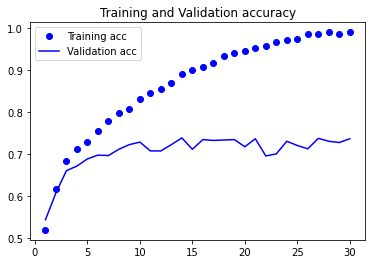

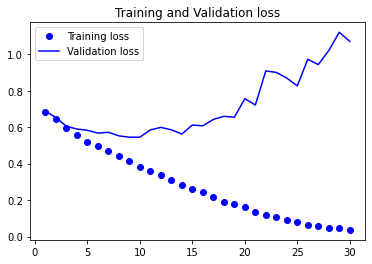

In [111]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Using data augmentation

* too few samples to learn from -> easy to occur overfitting problem
* data augmentation takes the approach of generating more training data from existing traing samples
* HOW? by augmenting the samples via a number of random transformations that yield believable-looking images

In [112]:
datagen = ImageDataGenerator(
    rotation_range = 40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
    horizontal_flip=True, fill_mode='nearest')

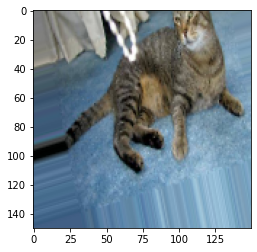

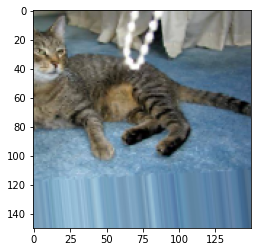

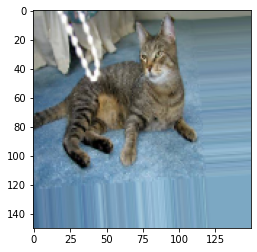

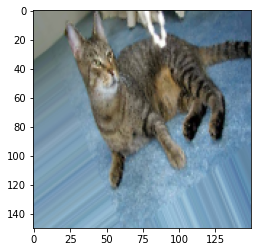

In [114]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
        
plt.show()

In [159]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s - loss: 0.6857 - acc: 0.5447 - val_loss: 0.6620 - val_acc: 0.5888
Epoch 2/100
100/100 [==============================] - 23s - loss: 0.6710 - acc: 0.5675 - val_loss: 0.6606 - val_acc: 0.5825
Epoch 3/100
100/100 [==============================] - 22s - loss: 0.6609 - acc: 0.5913 - val_loss: 0.6663 - val_acc: 0.5711.594 - ETA: 7s - loss: 0.6655 - ETA: 5s - los - ETA: 1s - loss: 0.6620 - acc: 
Epoch 4/100
100/100 [==============================] - 22s - loss: 0.6446 - acc: 0.6178 - val_loss: 0.6200 - val_acc: 0.6379
Epoch 5/100
100/100 [==============================] - 22s - loss: 0.6267 - acc: 0.6325 - val_loss: 0.6280 - val_acc: 0.5996
Epoch 6/100
100/100 [==============================] - 22s - loss: 0.6080 - acc: 0.6631 - val_loss: 0.6841 - val_acc: 0.5490
Epoch 7/100
100/100 [==============================] - 22s - loss: 0.5992 - acc: 0.6700 

Let's save our model -- we will be using it in the section on convnet visualization.

In [41]:
model.save('cats_and_dogs_small_2.h5')

Let's plot our results again:

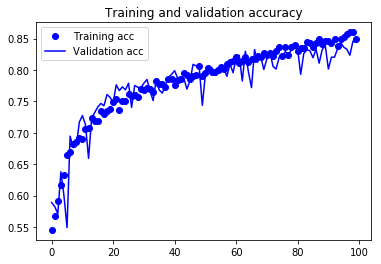

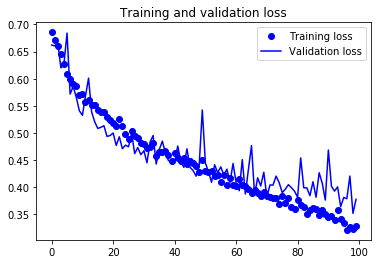

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()